In [225]:
print("      ")

In [4]:
import site
site.getsitepackages() 

['e:\\TMLC\\RTSA\\tmlc_env', 'e:\\TMLC\\RTSA\\tmlc_env\\lib\\site-packages']

#### Import the required packages

In [197]:
#Data pre-processing
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

#Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

#Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score

#Oversampling
from imblearn.over_sampling import SMOTE

#Misc
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import the data set

In [6]:
train = pd.read_csv('RTA Dataset.csv')
print(f"Number of data points {train.shape[0]}")
print(f"Number of features    {train.shape[1]}")


Number of data points 12316
Number of features    32


In [7]:
print("Number of columns: {}".format(len(train.columns)))
print('\n')
print(train.columns)

Number of columns: 32


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


#### Stats on features

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [9]:
train.describe(include='O').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [10]:
missing_details = pd.DataFrame(train.isnull().mean(), columns=['Missing_perc'])
missing_details.reset_index(inplace=True)
missing_details.sort_values(by='Missing_perc', ascending=False, inplace=True)
missing_details

,index,Missing_perc
10,Defect_of_vehicle,0.359451
9,Service_year_of_vehicle,0.318935
27,Work_of_casuality,0.259662
28,Fitness_of_casuality,0.213949
7,Type_of_vehicle,0.077135
14,Types_of_Junction,0.072020
6,Driving_experience,0.067311
4,Educational_level,0.060166
5,Vehicle_driver_relation,0.047012
8,Owner_of_vehicle,0.039136


In [11]:
train[train.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


#### Exploratory Data analysis

* Check the target distribution

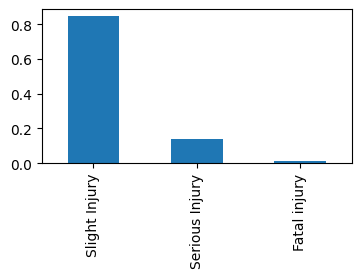

In [12]:
plt.figure(figsize=(4,2))
train['Accident_severity'].value_counts(normalize=True).plot(kind='bar')
plt.show()

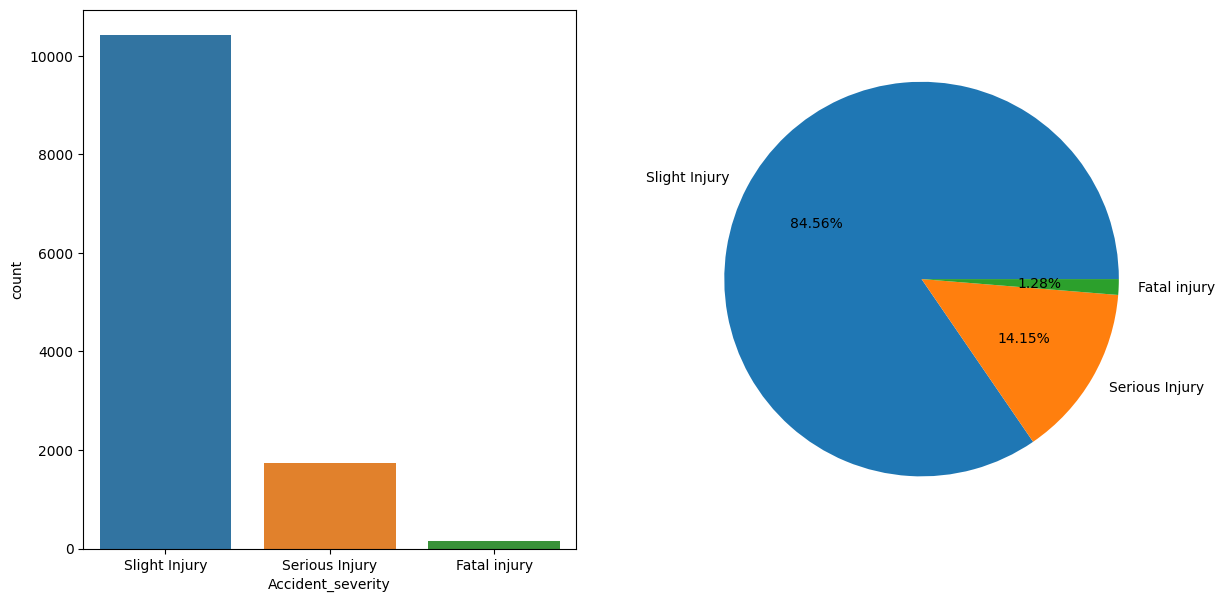

In [13]:
plt.figure(figsize=(14,7))

ax1 = plt.subplot(1,2,1)
sns.countplot(x=train['Accident_severity'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=train['Accident_severity'].value_counts(), labels=train['Accident_severity'].unique(), autopct='%1.2f%%')

plt.show()


* Classes are imbalanced
* Fatal injury is just 1.3% of total data points

In [14]:
int_cols = train.select_dtypes(include ='int64').columns
cat_cols = train.select_dtypes(include='O').columns

print('int_cols:', int_cols)
print('cat_cols:', cat_cols)

print(len(cat_cols) + len(int_cols))
print(len(train.columns))

int_cols: Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')
cat_cols: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
32
32


Day_of_week
Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Lanes_or_Medians
Road_allignment
Types_of_Junction
Road_surface_type
Road_surface_conditions
Light_conditions
Weather_conditions
Type_of_collision
Vehicle_movement
Casualty_class
Sex_of_casualty
Age_band_of_casualty
Casualty_severity
Work_of_casuality
Fitness_of_casuality
Pedestrian_movement
Cause_of_accident
Accident_severity


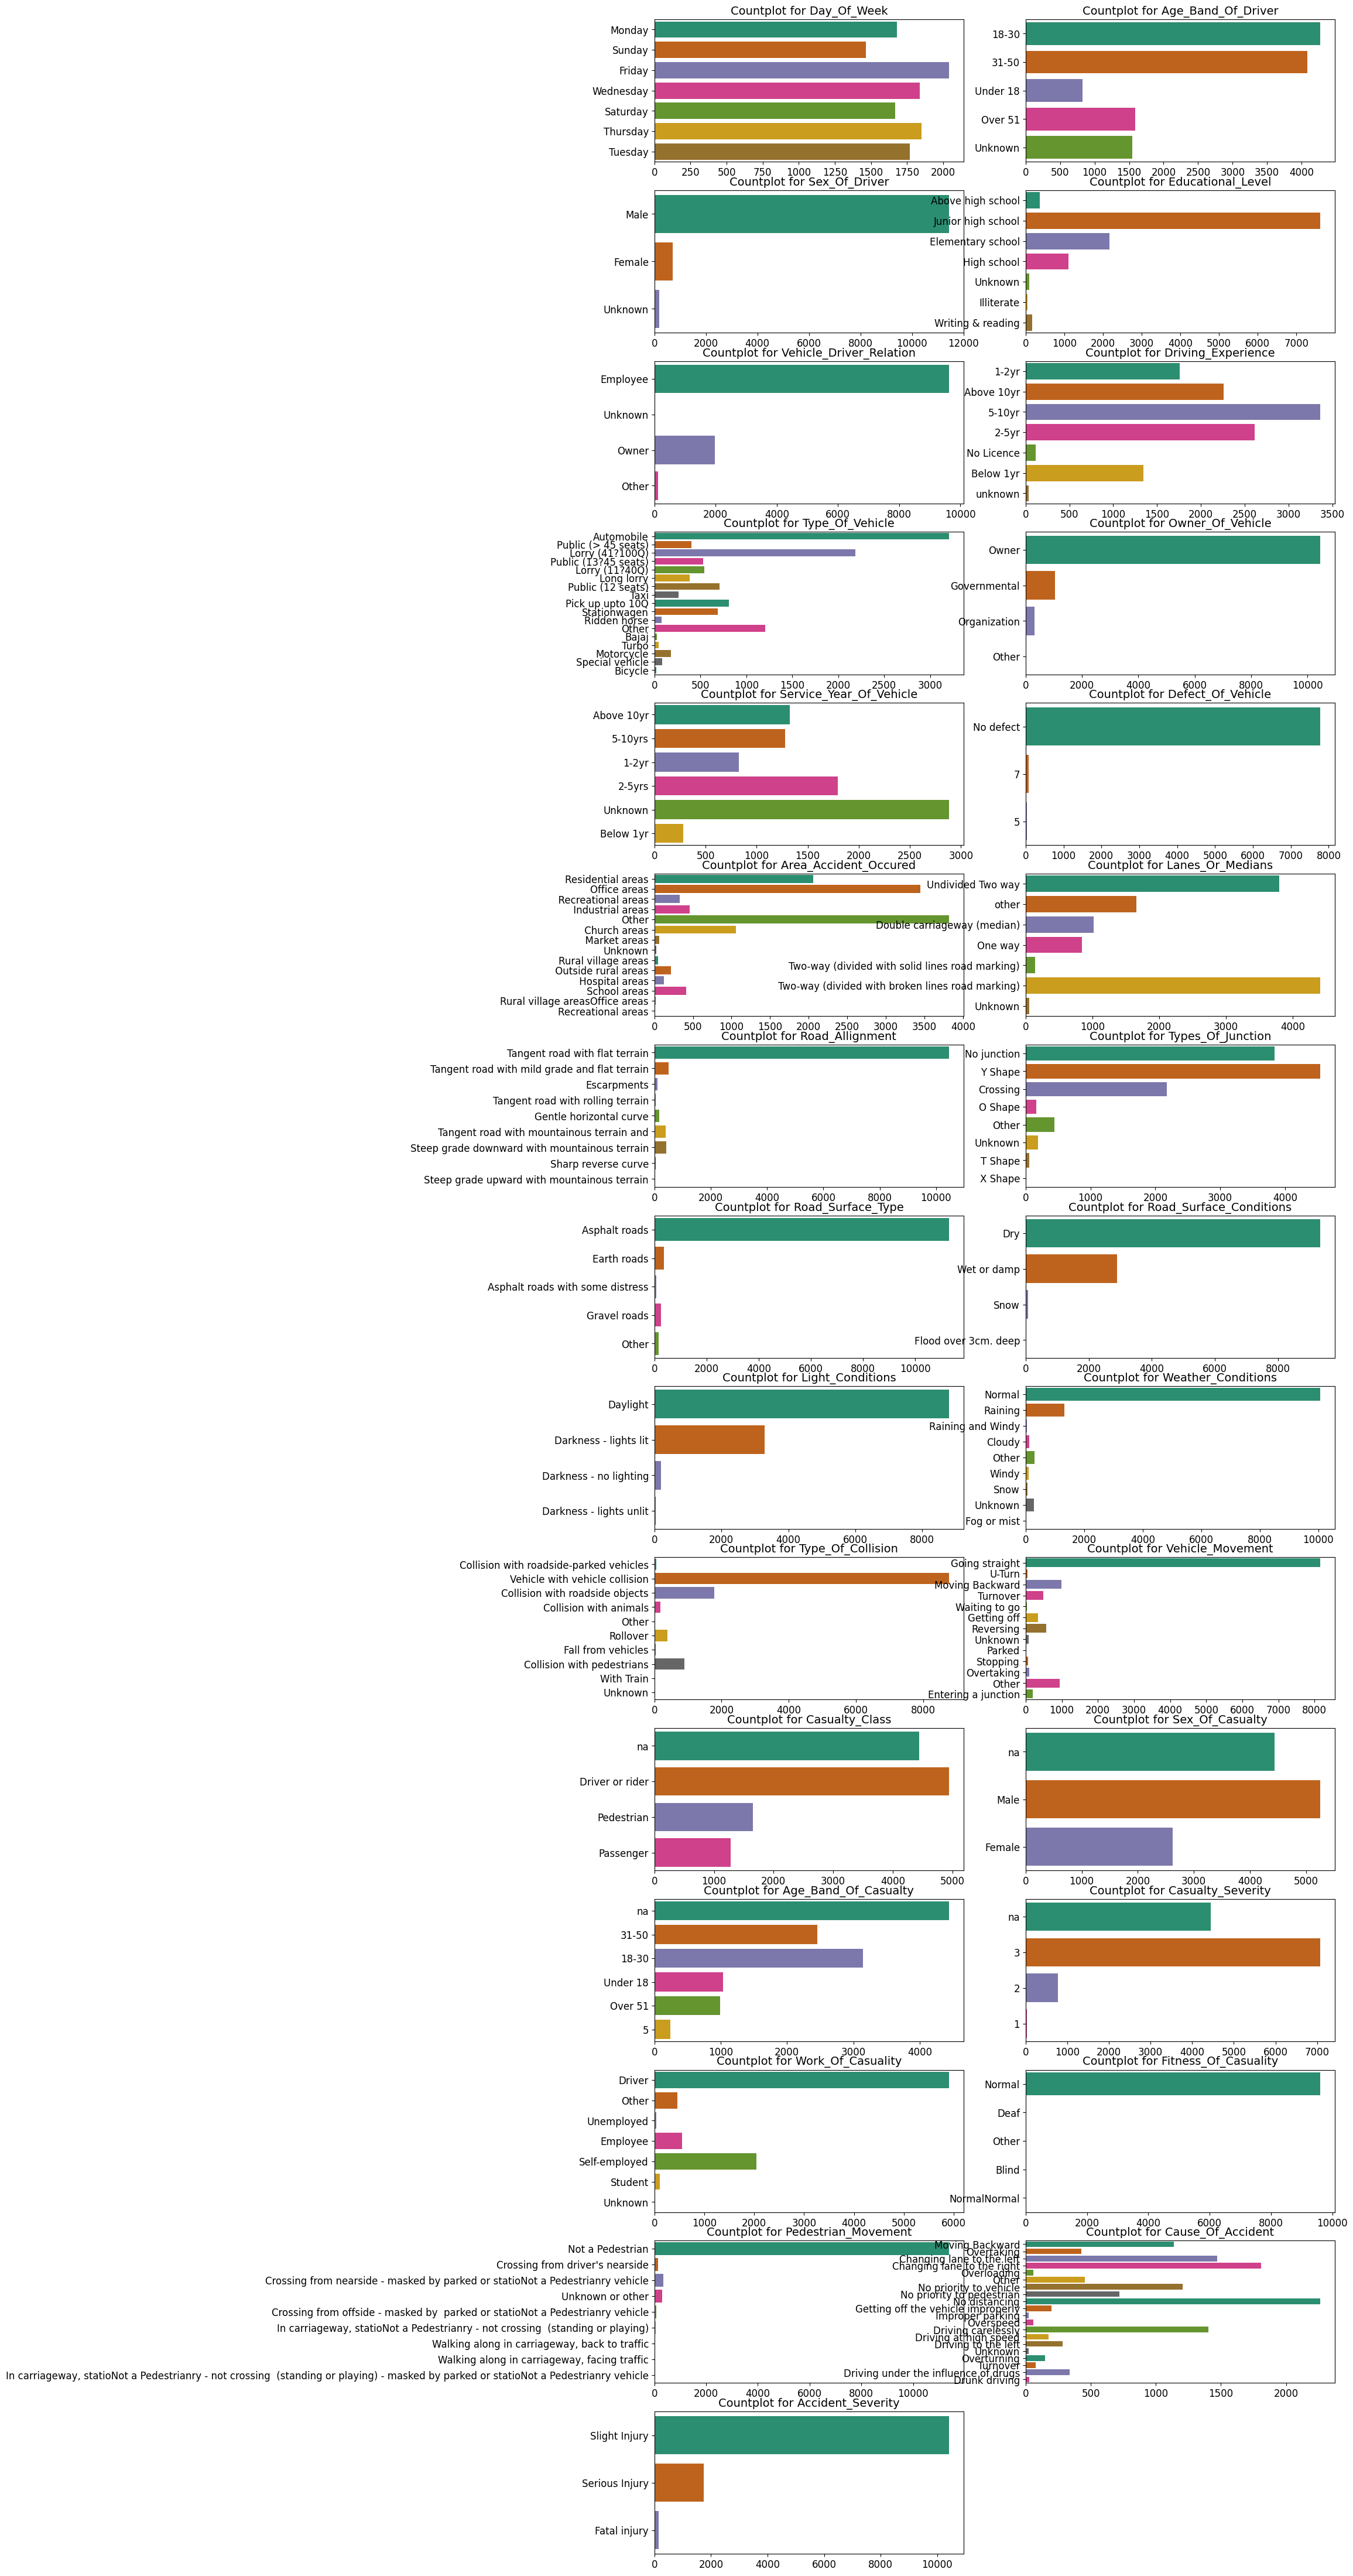

In [15]:
plt.figure(figsize=(15,60))
plotnumber=1

for col in cat_cols:
    
    if col not in ['Time']:
        print(col)
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=train, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(f"Countplot for {col.title()}", fontsize=14)
        plotnumber += 1
        plt.xlabel('')
        plt.ylabel('')
plt.tight_layout()
#plt.show()
    

Day_of_week: More accidents observed on Friday <br>
Age_band_of_driver: High frequency for the bin 18-30 <br>
Sex_of_driver: More Male drivers were involved in the accidents <br>
Educational_level: Junior high school dominates in the given data points <br>
Vehicle_driver_relation: Employee - EMployed driver is involved in the accidents (not owners) <br>
Driving_experience - 5-10yrs range has more frequency <br>
Type_of_vehicle - Category called automobile is involved more in accidents <br>
Owner_of_vehicle - Personal use vehicles are involved in the accidents <br>
Service_year_of_vehicle - Category unknoqn is more frequent (data not available) <br>
Defect_of_vehicle - Vehicles involved in accidents had no defects <br>
Area_accident_occured - Category called Other has more frequency in the data points. Second highest in office areas where accidents have been observed <br>
Lanes_or_Medians - Two-ways(divided with broken lines marking) caused more accidents <br>
Road_allignment - Tangent road with flat terrain has caused more accidents <br>
Types_of_Junction - Y Shape junction has led to many accidents <br>
Road_surface_type - Asphalt roads has caused many accidents <br>
Road_surface_conditions - Road surface has been dry in most of the cases <br>
Light_conditions - More accidents have taken place in day light conditions <br>
Weather_conditions - Normal weather has been observed most of the times <br>
Type_of_collision - Vehicle with Vehicle collision has been the case most of the times <br>
Vehicle_movement - Most data points represents vehcile movement as straight <br>
Casualty_class - Driver/rider has been the victim mostly <br>
Sex_of_casualty - Male victims are more <br>
Age_band_of_casualty - Data not available <br>
Casualty_severity - severity has been 3 mostly <br>
Work_of_casuality - victim has been driver mostly <br>
Fitness_of_casuality - Fitness has been normal - Other categories do not have any values <br>
Pedestrian_movement - Victims were not pedestrian <br>
Cause_of_accident - No distancing was the main cause of accidents


train['Time'] is of object type. Convert the same to timestamp

In [16]:
train['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

In [17]:
train['Time']=pd.to_datetime(train['Time'])
train['hour'] = train['Time'].dt.hour
train['minute'] = train['Time'].dt.minute
train.drop('Time', axis=1, inplace=True)

In [18]:
train[['hour', 'minute']].head()

,hour,minute
0,17,2
1,17,2
2,17,2
3,1,6
4,1,6


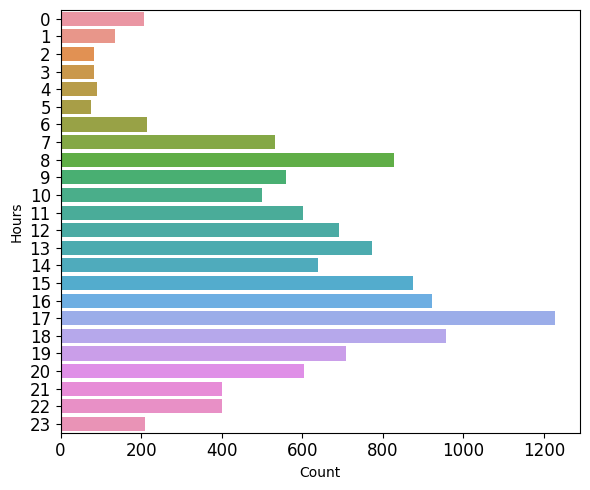

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(data=train, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count')
plt.ylabel('Hours')
plt.tight_layout()

* 5pm reported more accidents

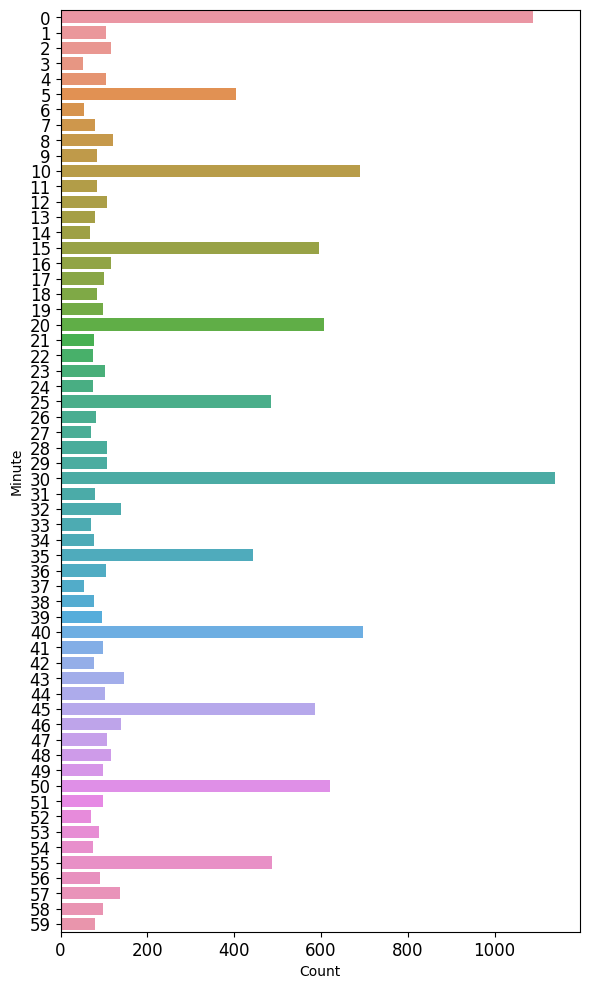

In [20]:
plt.figure(figsize=(6,10))
sns.countplot(data=train, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count')
plt.ylabel('Minute')
plt.tight_layout()

* Every 5th minute has reported more accidents - may be it is due to data entry mistake - to round off the event time

We can bin the time variable - Minutes not divisible by 5 can be added to the upper 5th minute

In [21]:
def get_hour(minute):
    if minute % 5 == 0:
        hour = minute
    else:
        act_hour = minute//5
        hour = (act_hour + 1 ) * 5
        
    if hour == 60:
        hour = 0
    
    return hour
        

In [22]:
train['minute'] = train['minute'].apply(lambda x: get_hour(x))

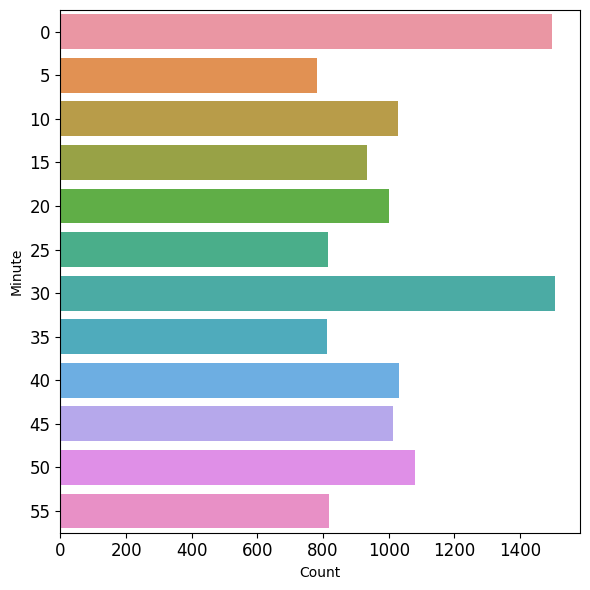

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(data=train, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count')
plt.ylabel('Minute')
plt.tight_layout()

* Missing value imputation using Mode

In [24]:
for col in missing_details[missing_details['Missing_perc'] != 0]['index']:
    train[col] = train[col].fillna(train[col].mode()[0])

In [25]:
missing_details1 = pd.DataFrame(train.isnull().mean(), columns=['Missing_perc'])
missing_details1.reset_index(inplace=True)
missing_details1.sort_values(by='Missing_perc', ascending=False, inplace=True)
missing_details1

,index,Missing_perc
0,Day_of_week,0.0
17,Weather_conditions,0.0
31,hour,0.0
30,Accident_severity,0.0
29,Cause_of_accident,0.0
28,Pedestrian_movement,0.0
27,Fitness_of_casuality,0.0
26,Work_of_casuality,0.0
25,Casualty_severity,0.0
24,Age_band_of_casualty,0.0


* All missing values have been imputed

#### Encoding

In [26]:
def ordinal_encoder(df, feats):
    
    for feat in feats:
        if df[feat].dtype == 'O':
            feat_key = list(df[feat].sort_values().unique())
            feat_val = list(1 + np.arange(df[feat].nunique()))
        
            key_val = dict(zip(feat_key, feat_val))
        
            df[feat] = df[feat].map(key_val)
        else:
            print(f"Column {feat} not encoded")
        
    return df

In [27]:
train_copy = train.copy()

In [28]:
train_copy

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17,5
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17,5
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17,5
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,10
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16,15
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18,0
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55


In [29]:
train_encoded = ordinal_encoder(train_copy, train_copy.drop('Accident_severity', axis=1).columns)
train_encoded

Column Number_of_vehicles_involved not encoded
Column Number_of_casualties not encoded
Column hour not encoded
Column minute not encoded


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,4,3,...,3,6,4,1,3,6,10,Slight Injury,17,5
1,2,2,2,5,1,4,12,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,17,5
2,2,1,2,5,1,1,6,4,6,3,...,2,2,3,1,3,6,1,Serious Injury,17,5
3,4,1,2,5,1,3,12,1,6,3,...,1,1,3,1,3,6,2,Slight Injury,1,10
4,4,1,2,5,1,2,1,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,1,2,5,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,16,15
12312,4,5,2,2,1,3,1,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,18,0
12313,4,3,2,5,1,3,2,4,2,3,...,2,2,3,1,3,6,2,Serious Injury,13,55
12314,4,1,1,5,1,4,6,4,2,3,...,3,6,4,1,3,6,6,Slight Injury,13,55


In [30]:
train_encoded.shape

(12316, 33)

In [31]:
train_encoded

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,4,3,...,3,6,4,1,3,6,10,Slight Injury,17,5
1,2,2,2,5,1,4,12,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,17,5
2,2,1,2,5,1,1,6,4,6,3,...,2,2,3,1,3,6,1,Serious Injury,17,5
3,4,1,2,5,1,3,12,1,6,3,...,1,1,3,1,3,6,2,Slight Injury,1,10
4,4,1,2,5,1,2,1,4,3,3,...,3,6,4,1,3,6,17,Slight Injury,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,1,2,5,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,16,15
12312,4,5,2,2,1,3,1,4,6,3,...,3,6,4,1,3,6,11,Slight Injury,18,0
12313,4,3,2,5,1,3,2,4,2,3,...,2,2,3,1,3,6,2,Serious Injury,13,55
12314,4,1,1,5,1,4,6,4,2,3,...,3,6,4,1,3,6,6,Slight Injury,13,55


In [32]:
var_details = pd.DataFrame(train_encoded.var('index'), columns=['var']).reset_index()
var_details[var_details['var'] < 1].sort_values(by='var', ascending=True)

,index,var
27,Fitness_of_casuality,0.014698
9,Defect_of_vehicle,0.017720
2,Sex_of_driver,0.069573
25,Casualty_severity,0.345431
19,Number_of_vehicles_involved,0.474431
14,Road_surface_type,0.485036
4,Vehicle_driver_relation,0.549637
23,Sex_of_casualty,0.551617
7,Owner_of_vehicle,0.770247
28,Pedestrian_movement,0.798540


In [33]:
train_encoded['Fitness_of_casuality'].value_counts(normalize=True)

3    0.994073
4    0.001543
2    0.001462
5    0.001462
1    0.001462
Name: Fitness_of_casuality, dtype: float64

In [34]:
train_encoded['Defect_of_vehicle'].value_counts(normalize=True)

3    0.990906
2    0.006171
1    0.002923
Name: Defect_of_vehicle, dtype: float64

In [35]:
train['Sex_of_driver'].value_counts(normalize=True)

Male       0.928629
Female     0.056918
Unknown    0.014453
Name: Sex_of_driver, dtype: float64

In [36]:
train['Casualty_severity'].value_counts(normalize=True)

3     0.574537
na    0.360750
2     0.062601
1     0.002111
Name: Casualty_severity, dtype: float64

* Below variables has very less variance 
    * Fitness of casuality 
    * Defect_of_vehicle 
* Will not be significant predictor

In [37]:
train_encoded.drop(['Fitness_of_casuality', 'Defect_of_vehicle'], axis=1, inplace=True)
train_encoded.shape

(12316, 31)

* Correlation plot

<AxesSubplot: >

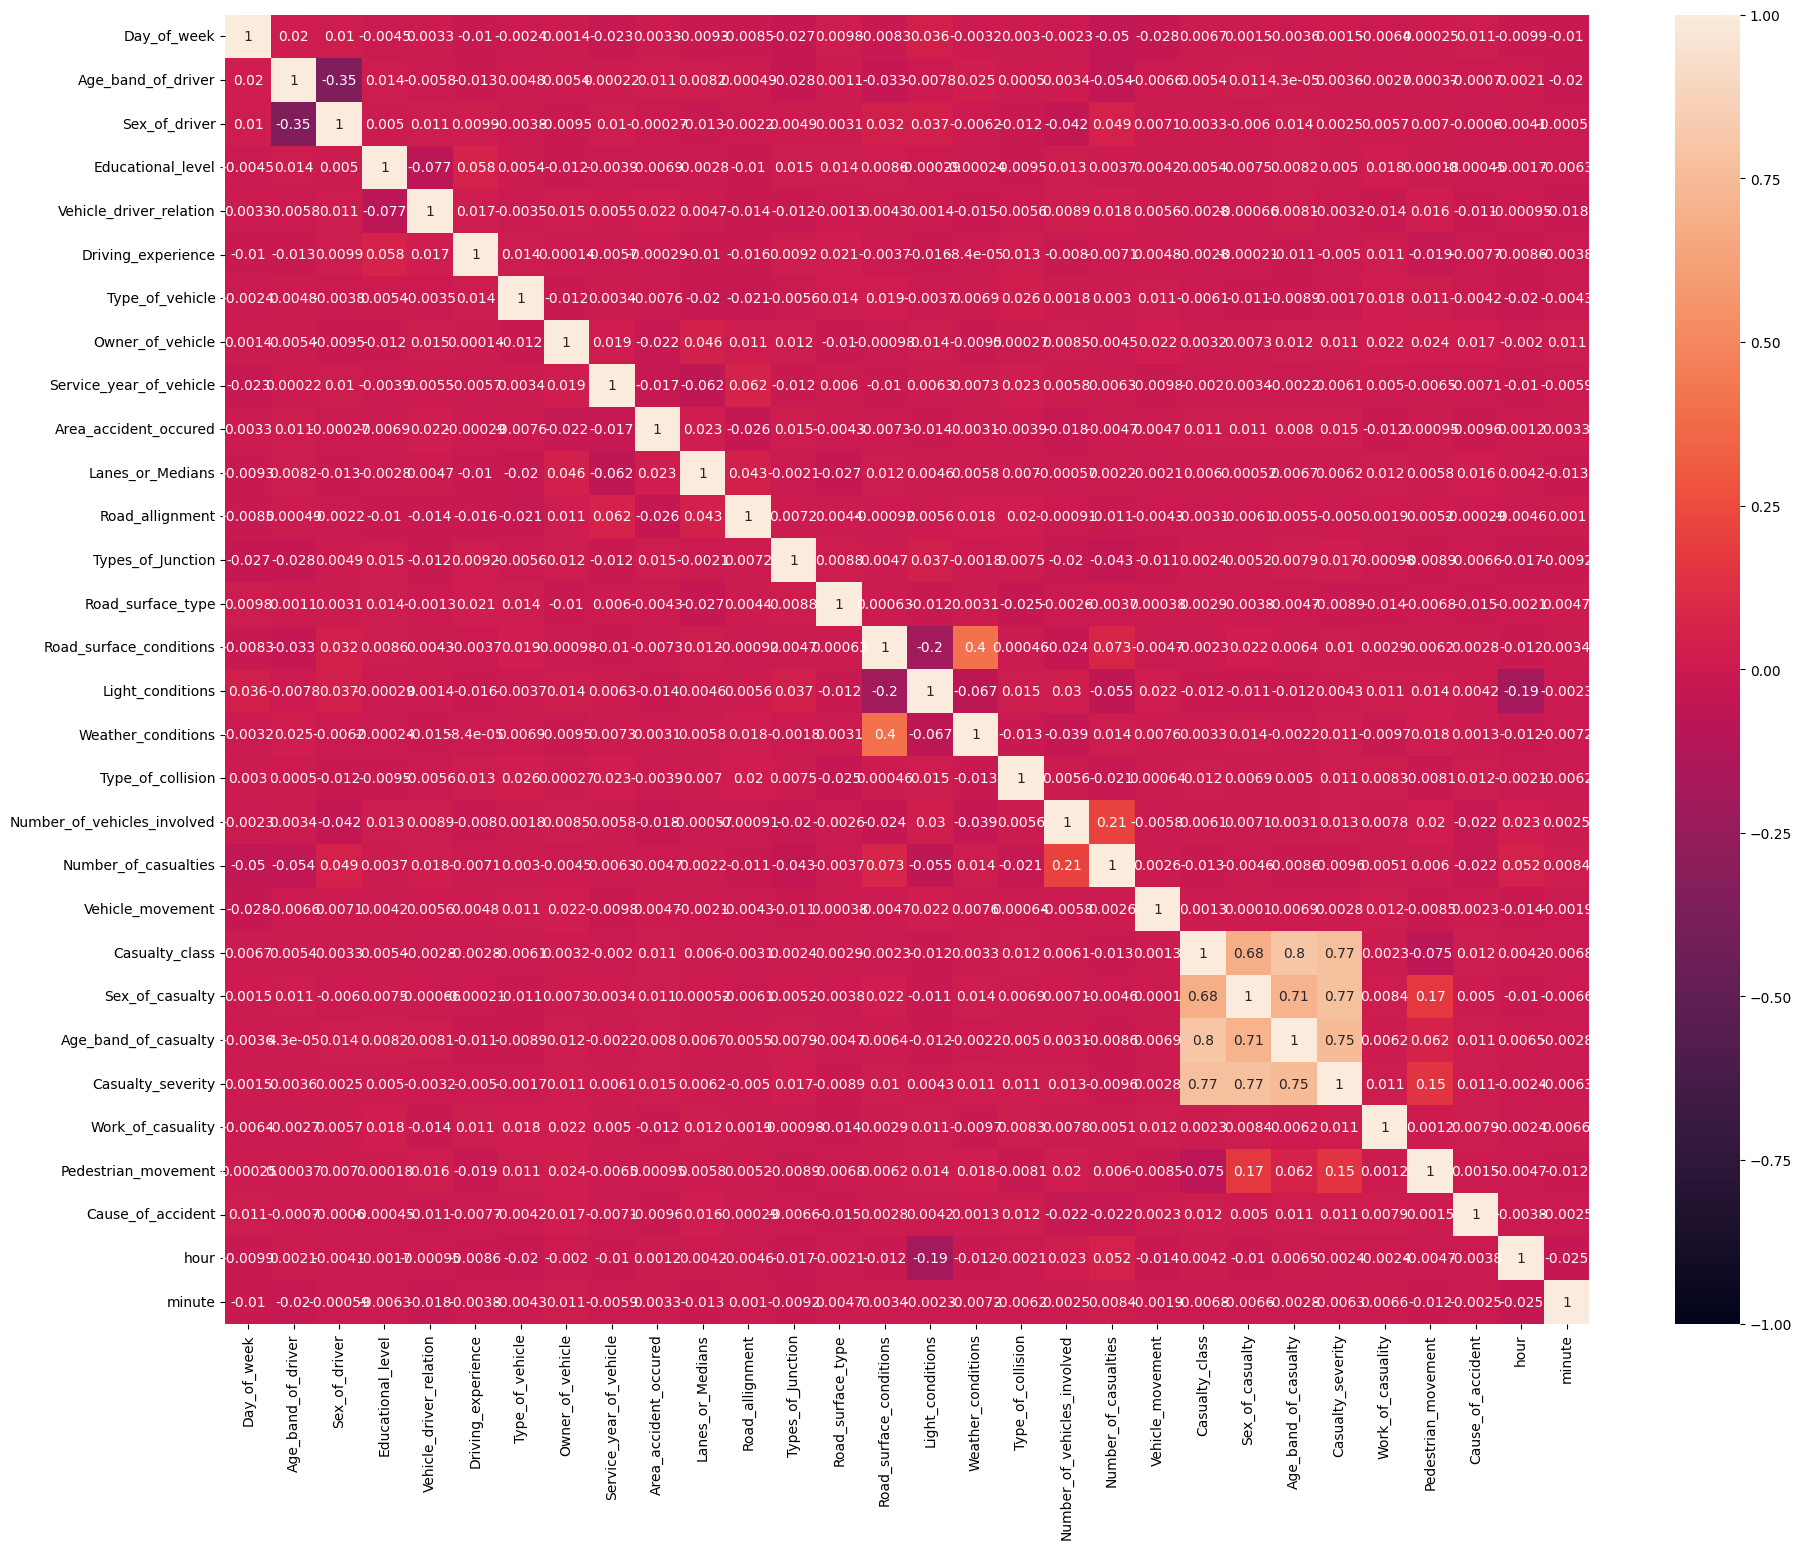

In [38]:
plt.figure(figsize=(22,17))
sns.heatmap(train_encoded.corr(), vmin=-1, vmax=+1, annot=True)

### Upsampling: SMOTE

In [39]:
X = train_encoded.drop('Accident_severity', axis=1)
Y = train_encoded['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1702)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8621, 30) (8621,)
(3695, 30) (3695,)


In [40]:
counter = Counter(y_train)

for k, v in counter.items():
    print(f"{k} : {v/len(y_train)}")

print('\n')    
print(X_train.shape, y_train.shape)    

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k, v in counter.items():
    print(f"{k} : {v/len(y_train)}")
print(X_train.shape, y_train.shape)    

Slight Injury : 0.8447975872868577
Serious Injury : 0.14255886788075628
Fatal injury : 0.012643544832386035


(8621, 30) (8621,)
Slight Injury : 0.3333333333333333
Serious Injury : 0.3333333333333333
Fatal injury : 0.3333333333333333
(21849, 30) (21849,)


### Encode the target

In [41]:
targ_map = dict(zip(list(y_train.unique()), [1,2,3]))
y_train=y_train.map(targ_map)
y_test =y_test.map(targ_map)

#### Modelling

In [42]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier


def fit_model(X_train, y_train, X_test, y_test, **kwargs):
    
    scores = {}
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        
        print(f"XGB: Train score {accuracy_score(y_train, xgb_model.predict(X_train))}")
        print(f"XGB: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"XGB: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        scores['xgb'] = accuracy_score(y_test, y_pred)
        
    if 'gbm' in kwargs.keys() and kwargs['gbm']:
        gbm_model = GradientBoostingClassifier()
        gbm_model.fit(X_train, y_train)
        y_pred = gbm_model.predict(X_test)
        
        print(f"GBM: Train score {accuracy_score(y_train, gbm_model.predict(X_train))}")
        print(f"GBM: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"GBM: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        scores['GBM'] = accuracy_score(y_test, y_pred)
        
    if 'logistic' in kwargs.keys() and kwargs['logistic']:
        log_model = LogisticRegression()
        log_model.fit(X_train, y_train)
        y_pred = log_model.predict(X_test)
        
        print(f"Log: Train score {accuracy_score(y_train, log_model.predict(X_train))}")
        print(f"Log: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"Log: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        scores['logistic'] = accuracy_score(y_test, y_pred)    
        
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf_model = RandomForestClassifier()
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        print(f"RF: Train score {accuracy_score(y_train, rf_model.predict(X_train))}")
        print(f"RF: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"RF: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        scores['rf'] = accuracy_score(y_test, y_pred)      
        
    if 'etc' in kwargs.keys() and kwargs['etc']:
        etc_model = RandomForestClassifier()
        etc_model.fit(X_train, y_train)
        y_pred = etc_model.predict(X_test)
        
        print(f"ETC: Train score {accuracy_score(y_train, etc_model.predict(X_train))}")
        print(f"ETC: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"ETC: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        scores['etc'] = accuracy_score(y_test, y_pred)              
        
    return scores        
        

In [43]:
fit_model(X_train, y_train, X_test, y_test, xgb=False, gbm=False, logistic=True, rf=True, etc=True)

Log: Train score 0.5565472103986453
Log: Test  score 0.5350473612990527
Log: F1    score 0.6150984768313246
[[1804  765  563]
 [ 273  148   93]
 [  14   10   25]]


RF: Train score 1.0
RF: Test  score 0.8143437077131258
RF: F1    score 0.7901041944172749
[[2920  210    2]
 [ 428   86    0]
 [  39    7    3]]


ETC: Train score 1.0
ETC: Test  score 0.8108254397834912
ETC: F1    score 0.7859186531364751
[[2916  213    3]
 [ 438   75    1]
 [  37    7    5]]




{'logistic': 0.5350473612990527,
 'rf': 0.8143437077131258,
 'etc': 0.8108254397834912}

* Lets work further on XGB Model

In [44]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Train accuracy {f1_score(y_train, model.predict(X_train), average='weighted')}")
print(f"Test  accuracy {f1_score(y_test, y_pred, average='weighted')}")

[16:33:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy 0.983426182548156
Test  accuracy 0.797329771801392


In [45]:
def model_performance(model, y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True,  cmap='Blues')
    
    print(f"Accuracy score : {accuracy_score(y_test, y_pred)}")
    print(f"F! score       : {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Precision score: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall score   : {recall_score(y_test, y_pred, average='weighted')}")

[[2937  183   12]
 [ 422   91    1]
 [  37    5    7]]
Accuracy score : 0.8213802435723951
F! score       : 0.797329771801392
Precision score: 0.7830800336450069
Recall score   : 0.8213802435723951


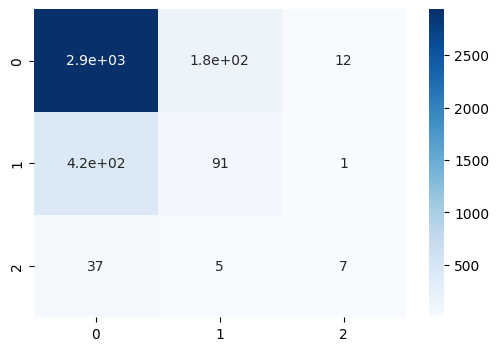

In [46]:
model_performance(model, y_test, y_pred)

Hyper-param tuning of XGBoost

In [102]:
xgb1 = XGBClassifier(
                        learning_rate =0.1,
                        n_estimators=350,
                        max_depth=8,
                        min_child_weight=1,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'multi:softmax',
                        nthread=4,
                        scale_pos_weight=1,
                        seed=27,
                        num_class= 4
                    )

In [103]:
xgb1.get_xgb_params()


{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 10,
 'min_child_weight': 1,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'nthread': 4,
 'seed': 27,
 'num_class': 4}

In [160]:
def modelfit(alg, X_train, y_train, X_test, early_stopping_rounds=50, cv_folds=5):
    
    xgb_params = alg.get_xgb_params()
    print(xgb_params)
    
    xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
    xgtest  = xgb.DMatrix(X_test)
    
    cvresult = xgb.cv(params=xgb_params, dtrain=xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                      metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
    alg.set_params(n_estimators=cvresult.shape[0])
    print(cvresult)
    
    #alg.fit(X_train, y_test, eval_metrics='merror')
    #Final fit
    final_gb = xgb.train(xgb_params, xgtrain)
    
    
    #Model report
    #print(f"Train f1 score is {f1_score(y_train, final_gb.predict(xgtrain), average='weighted')}")
    #print(f"Test  f1 score is {f1_score(y_test, final_gb.predict(xgtest), average='weighted')}")
    
    return final_gb

In [105]:
XGB_model_out = modelfit(xgb1, X_train, y_train, X_test)

{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_delta_step': None, 'max_depth': 10, 'min_child_weight': 1, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'nthread': 4, 'seed': 27, 'num_class': 4}
[17:26:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open

In [148]:
param_test1 = {   
 'n_estimators' : range(75,200,25),                
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27, num_class=4), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5, error_score=True, verbose=2)

gsearch1.fit(X_train ,y_train)

gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[19:43:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:43:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 75}, 1.0)

In [151]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 75}, 1.0)

In [152]:
xgb_final = gsearch1.best_estimator_
xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=4, nthread=4, num_class=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact', ...)

In [177]:
model = modelfit(xgb_final, X_train, y_train, X_test)

[19:58:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 27, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'nthread': 4, 'seed': 27

In [178]:
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
xgtest  = xgb.DMatrix(X_test)

np.argmax(model.predict(xgtrain), axis=1)

print(f"Train F1 score {f1_score(y_train, np.argmax(model.predict(xgtrain), axis=1),average='weighted')}")
print(f"Test  F1 score {f1_score(y_test, np.argmax(model.predict(xgtest), axis=1),average='weighted')}")

Train F1 score 0.6607840850545263
Test  F1 score 0.6606249027708319


In [188]:
xgb1 = XGBClassifier(
                        learning_rate =0.1,
                        n_estimators=550,
                        max_depth=10,
                        min_child_weight=2,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'multi:softmax',
                        nthread=4,
                        scale_pos_weight=1,
                        seed=27,
                        num_class= 4
                    )

xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
xgtest  = xgb.DMatrix(X_test)

xgb_params = xgb1.get_xgb_params()
model_cv =  xgb.cv(params=xgb_params, dtrain=xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
                      metrics='mlogloss', early_stopping_rounds=50)

fin_model = xgb.train(xgb_params, xgtrain)

[20:07:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:07:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:07:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576

In [226]:
y_pred = fin_model.predict(xgtest)
y_pred
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

0.7606848393309398


array([[2626,  415,   91],
       [ 365,  134,   15],
       [  25,   12,   12]], dtype=int64)

* Not able to tune further on XGBoost - Very time consuming 
* Lets try with extra tree classifier

#### Extra trees classifier

In [192]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

print(f"Train F1 score {f1_score(y_train, etc.predict(X_train), average='weighted')}")
print(f"Test  F1 score {f1_score(y_test, etc.predict(X_test), average='weighted')}")

Train F1 score 1.0
Test  F1 score 0.7878659812899075


In [193]:
etc.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [217]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

params = {
    'max_depth': [5,11],
    'ccp_alpha': [0.0, 0.1],
    'criterion' : ['gini'],
    'min_samples_split': [2,3],
    'n_estimators': range(100,500,100)
}

etc = ExtraTreesClassifier()

gsearchcv1 = GridSearchCV(estimator=etc, param_grid=params, scoring='f1_weighted', n_jobs=-1, verbose=3, cv=gkf)
extratree_model = gsearchcv1.fit(X_train, y_train)

print(gsearchcv1.best_params_, gsearch1.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 300} 1.0


In [218]:
gsearchcv1.best_params_, gsearch1.best_score_

({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 300},
 1.0)

In [219]:
y_pred = gsearchcv1.predict(X_test)
print(f"Test  F1 score {f1_score(y_test, y_pred, average='weighted')}")

Test  F1 score 0.7571159355843912


In [221]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

params = {
    'n_estimators': range(300,600,100),
    'max_depth'   : [11,15],
    'min_samples_split' : [2,3],
    'class_weight' : ['balanced', None]
}

etc = ExtraTreesClassifier(ccp_alpha= 0.0, criterion='gini', max_depth= 11, min_samples_split= 2, n_estimators= 300)

gsearchcv2 = GridSearchCV(estimator=etc, param_grid=params, scoring='f1_weighted', n_jobs=-1, verbose=3, cv=gkf2)
gsearchcv2.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002414BA35510>,
             estimator=ExtraTreesClassifier(max_depth=11, n_estimators=300),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [11, 15], 'min_samples_split': [2, 3],
                         'n_estimators': range(300, 600, 100)},
             scoring='f1_weighted', verbose=3)

In [222]:
gsearchcv2.best_params_, gsearchcv2.best_score_

({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 500},
 0.9242550094773044)

In [224]:
etc = ExtraTreesClassifier(ccp_alpha= 0.0, criterion='gini', max_depth= 15, min_samples_split= 2, n_estimators= 500,
                           class_weight=None)

etc.fit(X_train, y_train)

print(f"Train F1 score {f1_score(y_train, etc.predict(X_train), average='weighted')}")
print(f"Test  F1 score {f1_score(y_test, etc.predict(X_test), average='weighted')}")

Train F1 score 0.9870903234409819
Test  F1 score 0.7791847445150295


In [227]:
print(f1_score(y_test, etc.predict(X_test), average='weighted'))
confusion_matrix(y_test, etc.predict(X_test))

0.7791847445150295


array([[2866,  247,   19],
       [ 433,   78,    3],
       [  34,    9,    6]], dtype=int64)

* Test F1 score of Extra trees classifier is 77.9%
* Test F1 score of XG Boost is 76.06%
* However XGBoost classifies relatives more data points belonging to class-3

In [234]:
X_train.shape

(21849, 30)

In [238]:
sc = StandardScaler()
X_train_enc = sc.fit_transform(X_train)
X_train_enc = pd.DataFrame(X_train_enc, columns=X_train.columns)
#X_train_enc

X_test_enc = sc.transform(X_test)
X_test_enc = pd.DataFrame(X_test_enc, columns=X_test.columns)

In [239]:


log_model = LogisticRegression()
log_model.fit(X_train_enc, y_train)
y_pred = log_model.predict(X_test_enc)

print(f"Train F1 score {f1_score(y_train, log_model.predict(X_train_enc), average='weighted')}")
print(f"Test  F1 score {f1_score(y_test, log_model.predict(X_test_enc), average='weighted')}")

confusion_matrix(y_test, y_pred)

Train F1 score 0.5819475004700883
Test  F1 score 0.632441584876321


array([[1892,  729,  511],
       [ 278,  140,   96],
       [  13,   10,   26]], dtype=int64)

* Class 3 is classified well in baseline logistic regression

In [313]:
etc_out   = []
log_out   = []
final_out = []

for row in X_test.values:
    
    #print(row)
    #print(row.shape)
    row=row.reshape(1,-1)
    #print(row)
    #print(row.shape)
        
    etc_pred = etc.predict(row)
    etc_prob = etc.predict_proba(row)
    etc_out.append(etc_pred)
    
    log_pred = log_model.predict(sc.transform(row))
    log_prob = log_model.predict_proba(sc.transform(row))
    print('\n')
    #print(log_pred)
    log_out.append(log_pred)
    
    if log_pred[0] == 3:
        #print('\n')
        #print(log_pred, log_model.predict_proba(row)[0])
        #print(etc_pred, etc.predict_proba(row)[0])
        
        #print(log_model.predict_proba(sc.transform(row)[0][2].values.reshape(1,-1)))
        #print(etc.predict_proba(row)[0][2])
        print(log_prob)
        print(etc_prob)
        #if log_model.predict_proba(sc.transform(row.values.reshape(1,-1)))[0][2] > etc.predict_proba(row)[0][2]:
        if log_prob[0][2] > etc_prob[0][2]:
            final_out.append(log_pred)
            print("considering log model")
        else:
            final_out.append(etc_pred) 
    else:
        final_out.append(etc_pred) 
    











[[0.13427033 0.27221922 0.59351045]]
[[0.50744293 0.25909923 0.23345784]]
considering log model






[[0.33400343 0.18939086 0.47660571]]
[[0.62887398 0.23754462 0.1335814 ]]
considering log model
























[[0.3200277 0.2951766 0.3847957]]
[[0.55909377 0.30731593 0.1335903 ]]
considering log model












[[0.30828726 0.07243252 0.61928022]]
[[0.67095203 0.2300867  0.09896127]]
considering log model






[[0.31707275 0.23262377 0.45030347]]
[[0.69441284 0.208938   0.09664916]]
considering log model


























[[0.17728149 0.35323937 0.46947915]]
[[0.30005785 0.46997088 0.22997127]]
considering log model


[[0.07000357 0.33471031 0.59528613]]
[[0.38737364 0.53896365 0.0736627 ]]
considering log model








[[0.2669132  0.35871415 0.37437265]]
[[0.41348388 0.41855787 0.16795824]]
considering log model














[[0.19129618 0.37693834 0.43176547]]
[[0.41385813 0.42606774 0.16007413]]
considering log model

































In [314]:
f1_score(y_test, final_out, average='weighted')

0.7139086902136035

In [315]:
confusion_matrix(y_test, final_out)

array([[2423,  194,  515],
       [ 361,   57,   96],
       [  17,    6,   26]], dtype=int64)

* If we compare for probability for class-3 between logistic regression & extra trees classifier, then F1 score drops to 71.3% but class-3 predictons increase from 7 to 26 data points

* If we keep only the extra trees classifier, f1 score is 79% but class-3 predictions is low